In [1]:
import pandas as pd
import tensorflow as tf 
import keras
import matplotlib.pyplot as plt
import numpy as np
url= 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
data=pd.read_csv(url)
data=data[data.date>='2020-06-01']

In [2]:
data.head()

,date,state,fips,cases,deaths
4964,2020-06-01,Alabama,1,18534,646
4965,2020-06-01,Alaska,2,476,8
4966,2020-06-01,Arizona,4,20123,918
4967,2020-06-01,Arkansas,5,7443,133
4968,2020-06-01,California,6,115643,4287


In [3]:
covid= data.pivot(index='date', columns='state',values='cases').drop(["American Samoa"],axis=1).diff().rolling(10).mean().dropna()

In [4]:
covid

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-06-11,431.1,19.0,1140.2,337.3,2806.6,206.9,172.1,50.1,73.2,1223.9,...,552.4,1769.1,334.0,12.7,0.2,724.9,290.0,18.9,558.6,9.9
2020-06-12,493.9,19.1,1191.7,372.9,2920.4,203.3,171.0,48.8,76.8,1352.4,...,472.0,1806.5,344.4,13.1,0.2,697.2,296.8,19.3,551.0,11.5
2020-06-13,575.0,20.6,1252.8,402.8,3002.7,195.6,190.3,51.7,69.3,1478.8,...,459.2,1857.4,350.3,13.5,0.1,696.4,314.4,19.7,513.0,13.5
2020-06-14,654.3,19.2,1313.5,407.6,3003.6,176.9,184.9,51.8,64.7,1538.5,...,480.0,1821.2,345.5,10.1,0.2,665.0,313.6,18.8,494.8,13.9
2020-06-15,688.5,17.3,1263.6,426.6,2915.2,168.3,177.5,56.7,60.0,1583.8,...,514.6,1840.3,341.3,10.3,0.2,635.4,303.1,20.3,480.7,14.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-18,426.5,356.8,1269.4,227.9,11285.7,2400.8,2744.3,544.2,422.0,7535.0,...,946.5,3389.3,338.4,375.5,138.4,3212.9,3347.3,474.8,2652.8,66.4
2022-05-19,434.6,356.8,1269.4,262.0,11049.1,2491.5,2473.0,501.9,457.7,8432.9,...,1116.5,3631.6,788.8,291.7,119.8,2994.2,2499.0,473.1,2439.1,66.4
2022-05-20,444.2,356.8,1269.4,267.6,12782.5,2460.5,2490.7,558.7,389.9,7943.4,...,1050.1,3841.1,788.8,266.5,150.1,3130.5,3291.7,544.4,2441.1,37.8


<AxesSubplot:xlabel='date'>

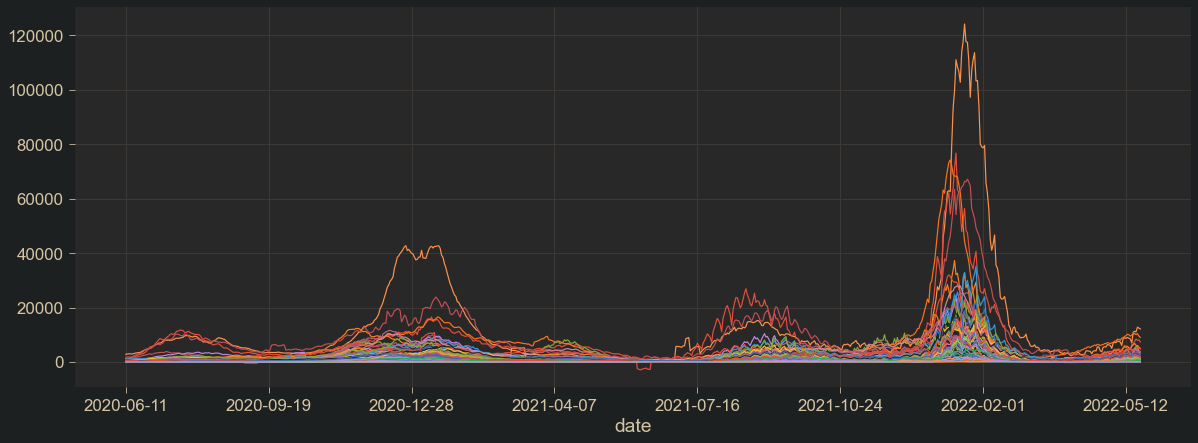

In [5]:
covid.plot(figsize=(20,7),legend = False)

In [6]:
maxima= covid.max()
minima= covid.min()

In [7]:
covid_scaled=(covid-minima)/(maxima-minima)

<AxesSubplot:xlabel='date'>

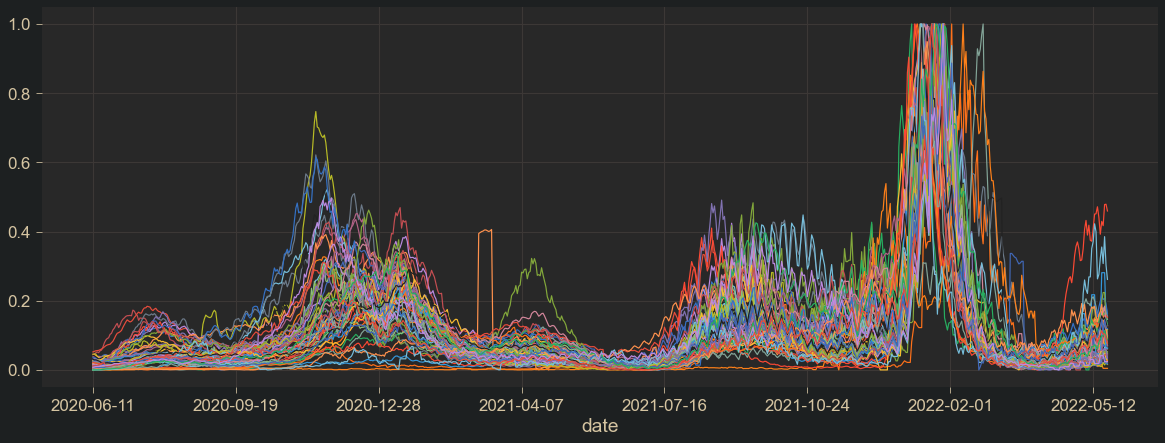

In [8]:
covid_scaled.plot(figsize=(20,7),legend = False)


In [9]:
covid_scaled.shape

(711, 55)

In [10]:
#the model will use the first thirty days to predict the last ten
n=40 # window size
list_df=[]
for i in range(538-n): 
    df= covid_scaled.T.iloc[:,i:i+n]
    df.columns=range(n)
    list_df.append(df)

In [11]:
list_df[2]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
state,,,,,,,,,,,,,,,,,,,,,
Alabama,0.031285,0.036665,0.038986,0.038877,0.038490,0.041672,0.043701,0.043565,0.040960,0.038029,...,0.085088,0.089926,0.094818,0.102254,0.109690,0.116244,0.113293,0.116997,0.117187,0.115932
Alaska,0.001016,0.000598,0.000030,0.000000,0.000478,0.000478,0.000866,0.000926,0.000627,0.000269,...,0.011562,0.011532,0.012399,0.013773,0.014580,0.015327,0.017388,0.019748,0.020764,0.020107
Arizona,0.049106,0.052035,0.049627,0.055151,0.057342,0.065713,0.078006,0.086203,0.090661,0.092876,...,0.143164,0.150338,0.149253,0.148785,0.149885,0.146059,0.137558,0.125554,0.127319,0.124622
Arkansas,0.034989,0.035488,0.037462,0.035633,0.036569,0.036652,0.040424,0.042741,0.042440,0.040268,...,0.058776,0.060927,0.060501,0.064429,0.068471,0.068856,0.067702,0.067162,0.063702,0.064616
California,0.017887,0.017894,0.017177,0.017852,0.018987,0.020174,0.020783,0.021688,0.021999,0.023813,...,0.058338,0.059562,0.061584,0.064002,0.064216,0.064000,0.064855,0.065460,0.066795,0.070457
Colorado,0.002323,0.001126,0.000576,0.000000,0.000499,0.000794,0.001575,0.001645,0.001914,0.001850,...,0.013460,0.014516,0.016302,0.018613,0.019835,0.019413,0.019105,0.018216,0.018728,0.020616
Connecticut,0.014330,0.013833,0.013152,0.010906,0.010262,0.009222,0.009498,0.009406,0.008725,0.006875,...,0.004114,0.004298,0.005274,0.003939,0.004731,0.004040,0.003111,0.003884,0.004261,0.005430
Delaware,0.029535,0.029566,0.031071,0.030794,0.029075,0.029842,0.031807,0.032851,0.034202,0.033527,...,0.043014,0.043536,0.041970,0.038869,0.042001,0.043351,0.043996,0.043505,0.044457,0.043996
District of Columbia,0.025427,0.023740,0.022015,0.020144,0.018896,0.018860,0.017539,0.016401,0.015814,0.014824,...,0.017282,0.018309,0.019960,0.020584,0.020034,0.020254,0.021355,0.021868,0.022969,0.025024


In [12]:
df= pd.concat(list_df,ignore_index=True).to_numpy().reshape(27390,40,1)

In [13]:
df

array([[[0.02152143],
        [0.02578229],
        [0.03128477],
        ...,
        [0.1162442 ],
        [0.11329281],
        [0.11699731]],

       [[0.00053778],
        [0.00056766],
        [0.0010158 ],
        ...,
        [0.0153267 ],
        [0.01738819],
        [0.01974844]],

       [[0.04367335],
        [0.04615808],
        [0.04910598],
        ...,
        [0.14605869],
        [0.13755753],
        [0.12555364]],

       ...,

       [[0.21457621],
        [0.22000606],
        [0.21444642],
        ...,
        [0.12084109],
        [0.09674209],
        [0.13442651]],

       [[0.10397173],
        [0.09942686],
        [0.08690436],
        ...,
        [0.13300553],
        [0.1137095 ],
        [0.12466888]],

       [[0.2725965 ],
        [0.27433469],
        [0.24802206],
        ...,
        [0.09763846],
        [0.07216495],
        [0.09164469]]])

In [14]:
# train/validation/test_split
from sklearn.model_selection import train_test_split
X=df[:,0:30]
y=df[:,30:40]
X_train,X_test,y_train,y_test=train_test_split(X,y)
x_train1, x_val, y_train1, y_val=train_test_split(X_train,y_train)

In [15]:
x_val

array([[[0.13078943],
        [0.12442884],
        [0.11774439],
        ...,
        [0.05841425],
        [0.06443582],
        [0.06491653]],

       [[0.0200634 ],
        [0.01913196],
        [0.0210399 ],
        ...,
        [0.04769094],
        [0.05201761],
        [0.05611141]],

       [[0.17991391],
        [0.18447712],
        [0.23596489],
        ...,
        [0.20559317],
        [0.215843  ],
        [0.21953135]],

       ...,

       [[0.01549293],
        [0.01506363],
        [0.01279312],
        ...,
        [0.06126576],
        [0.06691343],
        [0.06965141]],

       [[0.01775187],
        [0.01857496],
        [0.01915334],
        ...,
        [0.02411407],
        [0.02640536],
        [0.02816275]],

       [[0.22493673],
        [0.2395721 ],
        [0.24415235],
        ...,
        [0.16661696],
        [0.17824727],
        [0.17970775]]])

In [16]:
model=keras.models.Sequential([
    keras.layers.SimpleRNN(units=50, return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(units=50),
    keras.layers.Dense(units=10) 
])

In [17]:
#compile
model.compile(loss='mse', optimizer='adam')
# fit data
model.fit(X_train,y_train, epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
213/642 [========>.....................] - ETA: 32s - loss: 0.0017

KeyboardInterrupt: 

In [ ]:
y_test_pred=model.predict(X_test)

In [ ]:
index=150
plt.plot(np.arange(0,30),X_test[index])
plt.plot(np.arange(30,40),X_test[index],label='actual')
plt.plot(np.arange(30,40),X_test[index],label='forecast',color='red')

In [ ]:
y_test_pred[index].shape

In [ ]:
state='Montana'
cases_scaled= covid_scaled[state].iloc[-31:-1].to_numpy().reshape(1,30,1)#last 30 days
cases= covid[state].iloc[-31:-1].to_numpy().reshape(1,30,1)#last 30 days
cases_forecast=(maxima[state]-minima[state])*model.predict(cases_scaled+minima[state]

In [ ]:
index=0
plt.plot(np.arrage(0,30),cases.flatten(),'0--')
plt.plot(np.arrage(30,40),cases_forecast.flatten(),'0--',color='red')
